In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
from tensorflow import keras
#import torch
import os
import audioread
import math, random
from IPython.display import Audio
#from torchaudio import transforms
#import torchaudio

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#path = "/content/drive/MyDrive/alzheimers_training_data.txt"
path = "/content/drive/MyDrive/Alz_train_labels.txt"

df = pd.read_csv(path, sep=";", header=None)
df.columns = ["ID", "Age", "Gender", "MMSE"]
df = df.iloc[1: , :]

#Diagnosis Column
conditions = [
    (df["MMSE"].astype(int) >= 25),
    #(df["MMSE"].astype(int) >= 20) & (df["MMSE"].astype(int) < 25),
    #(df["MMSE"].astype(int) >= 13) & (df["MMSE"].astype(int) < 20),
    (df["MMSE"].astype(int) < 25)
    ]
#values = ['Normal', 'Mild', 'Moderate', 'Severe']
values = [1,2]
df['Diagnosis'] = np.select(conditions, values)

df

,ID,Age,Gender,MMSE,Diagnosis
1,S002,62,female,30.0,1
2,S003,69,female,29.0,1
3,S004,71,female,30.0,1
4,S005,74,female,30.0,1
5,S006,67,female,29.0,1
...,...,...,...,...,...
103,S150,58,male,20.0,2
104,S151,72,male,24.0,2
105,S153,68,female,12.0,2
106,S154,65,female,20.0,2


(array([58.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 49.]),
 array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. ]),
 <a list of 10 Patch objects>)

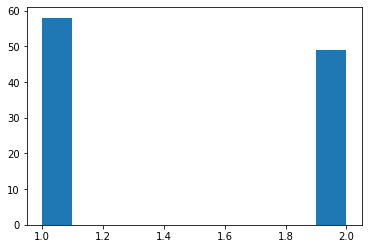

In [ ]:
plt.hist(df['Diagnosis'])

In [ ]:
path = "/content/drive/MyDrive/alz_test_data.txt"

df_test = pd.read_csv(path, sep=";", header=None)
df_test.columns = ["ID", "Age", "Gender", "Diagnosis2", "MMSE"]
df_test = df_test.iloc[1: , :]

#Diagnosis Column

conditions = [
    (df_test["MMSE"].astype(int) >= 25),
    #(df_test["MMSE"].astype(int) >= 20) & (df_test["MMSE"].astype(int) < 25),
    #(df_test["MMSE"].astype(int) >= 13) & (df_test["MMSE"].astype(int) < 20),
    (df_test["MMSE"].astype(int) < 25)
    ]

#values = ['Normal', 'Mild', 'Moderate', 'Severe']
values = [1, 2]
df_test['Diagnosis'] = np.select(conditions, values)
df_test["ID"].str.strip()

df_test

,ID,Age,Gender,Diagnosis2,MMSE,Diagnosis
1,S160,63,1,0,28,1
2,S161,55,1,0,29,1
3,S162,67,1,1,24,2
4,S163,71,0,0,30,1
5,S164,73,1,1,21,2
6,S165,64,0,1,15,2
7,S166,73,1,0,29,1
8,S167,65,0,1,28,1
9,S168,71,0,1,27,1
10,S169,78,0,1,26,1


In [ ]:
#print(plt.hist(df_test['Diagnosis']))
def count_diagnosis():
  count_1 = 0.0
  count_2 = 0.0
  for d in df_test['Diagnosis']:
    if d==1.0:
      count_1 = count_1 + 1
    else:
      count_2 = count_2 + 1
  return count_1/(count_1+count_2)
print(count_diagnosis())

0.5833333333333334


In [ ]:
# Below are unmerged TRAINING files
directory2 = "/content/drive/MyDrive/Alzheimers_audio_train"


def concat_audio (id):

  all_fnames = os.listdir(directory2) # Get all the filenames in your drive folder
  good_fnames = [fname for fname in all_fnames if fname.startswith(id)]  # Get only the filenames starting with id
  audio_files = []

  for filename in good_fnames:
    f = os.path.join(directory2, filename)
    waveform, sample_rate = torchaudio.load(f)
    audio_files.append(waveform.squeeze())

  output = torch.hstack(audio_files)
  return output.unsqueeze(0), sample_rate
#print(concat_audio("S001")[0].shape)

In [ ]:
def pk(directory):
	for filename in os.listdir(directory):
		f = os.path.join(directory, filename)
		# checking if it is a file
		if os.path.isfile(f):
			print(f)
# UNREFINED TRAINING
#pk("/content/drive/MyDrive/cc")

# REFINED TEST
pk("/content/drive/MyDrive/Alz_test")

/content/drive/MyDrive/Alz_test/S177.wav
/content/drive/MyDrive/Alz_test/S161.wav
/content/drive/MyDrive/Alz_test/S180.wav
/content/drive/MyDrive/Alz_test/S201.wav
/content/drive/MyDrive/Alz_test/S199.wav
/content/drive/MyDrive/Alz_test/S166.wav
/content/drive/MyDrive/Alz_test/S197.wav
/content/drive/MyDrive/Alz_test/S193.wav
/content/drive/MyDrive/Alz_test/S186.wav
/content/drive/MyDrive/Alz_test/S175.wav
/content/drive/MyDrive/Alz_test/S184.wav
/content/drive/MyDrive/Alz_test/S178.wav
/content/drive/MyDrive/Alz_test/S174.wav
/content/drive/MyDrive/Alz_test/S163.wav
/content/drive/MyDrive/Alz_test/S202.wav
/content/drive/MyDrive/Alz_test/S170.wav
/content/drive/MyDrive/Alz_test/S204.wav
/content/drive/MyDrive/Alz_test/S160.wav
/content/drive/MyDrive/Alz_test/S207.wav
/content/drive/MyDrive/Alz_test/S196.wav
/content/drive/MyDrive/Alz_test/S206.wav
/content/drive/MyDrive/Alz_test/S183.wav
/content/drive/MyDrive/Alz_test/S172.wav
/content/drive/MyDrive/Alz_test/S195.wav
/content/drive/M

In [ ]:
def duration_detector(length):
    hours = length // 3600  # calculate in hours
    length %= 3600
    mins = length // 60  # calculate in minutes
    length %= 60
    seconds = length  # calculate in seconds

    return hours, mins, seconds

def duration_print(directory):
  for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    if os.path.isfile(f):
      k = audioread.audio_open(f).duration
      hours,mins,seconds = duration_detector(int(k))
      print(f + 'Total Duration: {}:{}:{}'.format(hours,mins,seconds))

In [ ]:
#Straight audio-classification approach:
# Audio wave -> spectrogram -> Image Classification

In [ ]:
"""
import math, random
import os
import torch
import torchaudio
from torchaudio import transforms
from IPython.display import Audio
"""

class AudioUtil():
  # ----------------------------
  # Load an audio file. Return the signal as a tensor and the sample rate
  # ----------------------------
    @staticmethod
    def open(audio_file):
      sig, sr = torchaudio.load(audio_file)
      return (sig, sr)

       # ----------------------------
  # Pad (or truncate) the signal to a fixed length 'max_ms' in milliseconds
  # ----------------------------
    @staticmethod
    def pad_trunc(aud, max_ms):
      sig, sr = aud
      num_rows, sig_len = sig.shape
      max_len = sr//1000 * max_ms

      if (sig_len > max_len):
      # Truncate the signal to the given length
        sig = sig[:,:max_len]

      elif (sig_len < max_len):
      # Length of padding to add at the beginning and end of the signal
        pad_begin_len = random.randint(0, max_len - sig_len)
        pad_end_len = max_len - sig_len - pad_begin_len

      # Pad with 0s
        pad_begin = torch.zeros((num_rows, pad_begin_len))
        pad_end = torch.zeros((num_rows, pad_end_len))

        sig = torch.cat((pad_begin, sig, pad_end), 1)

      return (sig, sr)

    # ----------------------------
    # Convert the given audio to the desired number of channels
    # ----------------------------
    @staticmethod
    def rechannel(aud, new_channel):
      sig, sr = aud

      if (sig.shape[0] == new_channel):
        # Nothing to do
        return aud

      if (new_channel == 1):
        # Convert from stereo to mono by selecting only the first channel
        resig = sig[:1, :]
      else:
        # Convert from mono to stereo by duplicating the first channel
        resig = torch.cat([sig, sig])

      return ((resig, sr))


        # ----------------------------
    # Since Resample applies to a single channel, we resample one channel at a time
    # ----------------------------
    @staticmethod
    def resample(aud, newsr):
      sig, sr = aud

      if (sr == newsr):
        # Nothing to do
        return aud

      num_channels = sig.shape[0]
      # Resample first channel
      resig = torchaudio.transforms.Resample(sr, newsr)(sig[:1,:])
      if (num_channels > 1):
        # Resample the second channel and merge both channels
        retwo = torchaudio.transforms.Resample(sr, newsr)(sig[1:,:])
        resig = torch.cat([resig, retwo])

      return ((resig, newsr))


    # ----------------------------
    # Pad (or truncate) the signal to a fixed length 'max_ms' in milliseconds
    # ----------------------------
    @staticmethod
    def pad_trunc(aud, max_ms):
      sig, sr = aud
      num_rows, sig_len = sig.shape
      max_len = sr//1000 * max_ms

      if (sig_len > max_len):
        # Truncate the signal to the given length
        sig = sig[:,:max_len]

      elif (sig_len < max_len):
        # Length of padding to add at the beginning and end of the signal
        pad_begin_len = random.randint(0, max_len - sig_len)
        pad_end_len = max_len - sig_len - pad_begin_len

        # Pad with 0s
        pad_begin = torch.zeros((num_rows, pad_begin_len))
        pad_end = torch.zeros((num_rows, pad_end_len))

        sig = torch.cat((pad_begin, sig, pad_end), 1)

      return (sig, sr)



    # ----------------------------
    # Shifts the signal to the left or right by some percent. Values at the end
    # are 'wrapped around' to the start of the transformed signal.
    # ----------------------------
    @staticmethod
    def time_shift(aud, shift_limit):
      sig,sr = aud
      _, sig_len = sig.shape
      shift_amt = int(random.random() * shift_limit * sig_len)
      return (sig.roll(shift_amt), sr)


    # ----------------------------
    # Generate a Spectrogram
    # ----------------------------
    @staticmethod
    def spectro_gram(aud, n_mels=64, n_fft=1024, hop_len=None):
      sig,sr = aud
      top_db = 80

      # spec has shape [channel, n_mels, time], where channel is mono, stereo etc
      spec = transforms.MelSpectrogram(sr, n_fft=n_fft, hop_length=hop_len, n_mels=n_mels)(sig)

      # Convert to decibels
      spec = transforms.AmplitudeToDB(top_db=top_db)(spec)
      return (spec)


In [ ]:
def train_names():

  train_d = "/content/drive/MyDrive/Alzheimers_audio_train"
  all_id = []
  all_fnames = os.listdir(train_d) # Get all the filenames in your drive folder
  for id_name in all_fnames:
    name = id_name[0:4]

    all_id.append(name)
  return sorted(list(set(all_id)))

In [ ]:
#from playsound import playsound
obj = AudioUtil()

# Train spectogram, train labels
spectrogram_train = []
labels_train = []

for training_id in train_names():
  aud = concat_audio(training_id)
  aud1 = obj.pad_trunc(aud, 13500)
  spec = obj.spectro_gram(aud1).squeeze(0).unsqueeze(-1)
  spec = tf.convert_to_tensor(spec.numpy()) # Convert from pytorch --> tensorflow
  label = df[df['ID'] == training_id]['Diagnosis'].values[0]
  labels_train.append(label)
  spectrogram_train.append(spec)

labels_train = np.asarray(labels_train) - 1
spectrogram_train = np.asarray(spectrogram_train) - 1

In [ ]:
# Test spectogram, test labels
spectrogram_test = []
labels_test = []

test_d = "/content/drive/MyDrive/Alz_test"
for filename in os.listdir(test_d):
  f = os.path.join(test_d, filename)
  aud = obj.open(f)
  aud1 = obj.pad_trunc(aud, 13500) #change audio length, find smallest length
  spec = obj.spectro_gram(aud1).squeeze(0).unsqueeze(-1)
  spec = tf.convert_to_tensor(spec.numpy()) # Convert from pytorch --> tensorflow
  k = filename[:-4]
  label = df_test[df_test['ID'] == k + " "]['Diagnosis'].values[0]
  labels_test.append(label)
  spectrogram_test.append(spec)

labels_test = np.asarray(labels_test) - 1
spectrogram_test = np.asarray(spectrogram_test) - 1

In [ ]:
print(labels_train)
print("\n")
print(labels_test)

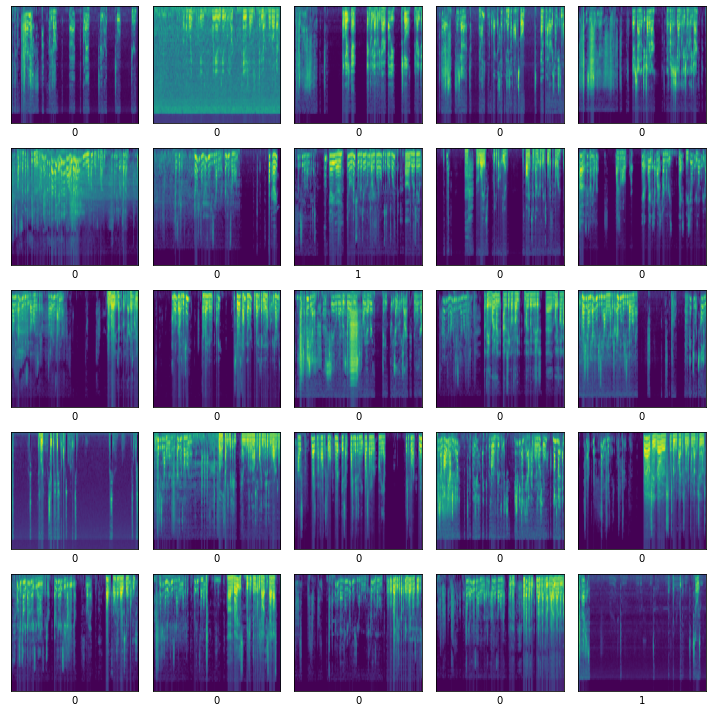

In [ ]:
class_names = ['Normal', 'Alzheimers']

indexes = np.arange(0,25)

fig, axes = plt.subplots(5, 5, figsize=(10, 10))
for i in range(25):
  axes[i//5, i%5].set_xticks([])
  axes[i//5, i%5].set_yticks([])
  axes[i//5, i%5].imshow(spectrogram_test[indexes[i]].squeeze())
  axes[i//5, i%5].set_xlabel(labels_test[indexes[i]])
  axes[i//5, i%5].set_aspect('auto')
plt.tight_layout()
plt.show()

In [ ]:
label = df_test[df_test['ID'] == "S177 "]
label

,ID,Age,Gender,Diagnosis2,MMSE,Diagnosis
18,S177,65,0,0,30,1


In [ ]:
df_test["ID"][18]

'S177 '

In [ ]:
### DISPLAYING SPECTOGRAM
aud = obj.open("/content/drive/MyDrive/S001.wav")
aud = obj.pad_trunc(aud, 5000)
spec = obj.spectro_gram(aud)

fig, axs = plt.subplots(figsize=(8, 10))
axs.imshow(spec.squeeze())

In [ ]:
spectrogram_train_normalized = []
spectrogram_test_normalized = []

for spectrogram in spectrogram_train:
  spectrogram = spectrogram / 255.0
  spectrogram_train_normalized.append(spectrogram)


for spectrogram in spectrogram_test:
  spectrogram = spectrogram / 255.0
  spectrogram_test_normalized.append(spectrogram)

In [ ]:
print(labels_train)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 3, 3, 4, 1, 2, 3, 4, 3, 4, 3, 1, 3, 2, 3, 3, 3, 2, 1, 1, 2, 3, 3, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 2, 2, 3, 1, 3, 3, 3, 3, 3, 3, 3, 4, 2, 2, 4, 2, 3]


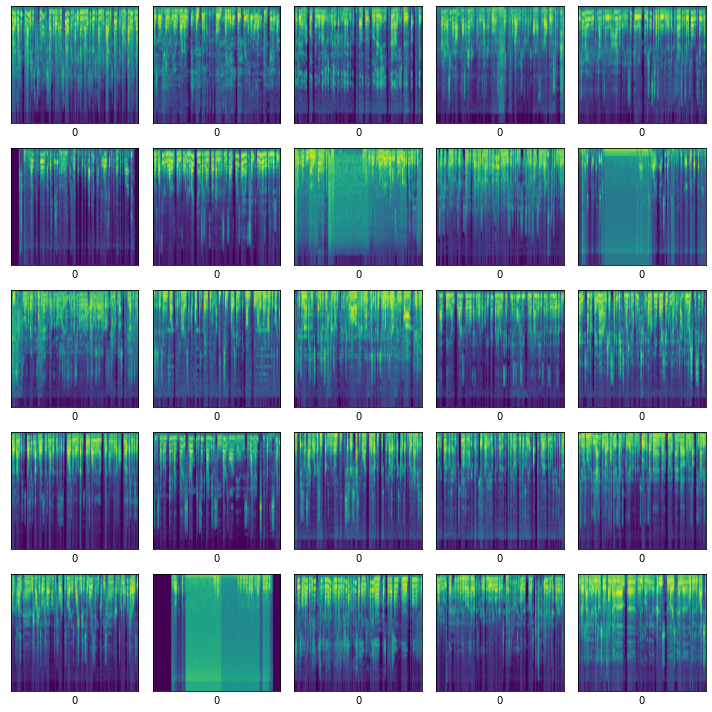

In [ ]:
# ATTACH DATA SET
#SAMPLE, NOT REPRESENTATIVE OF FULL DATASET

class_names = ['Normal', 'Alzheimers']

indexes = np.arange(25,60)

fig, axes = plt.subplots(5, 5, figsize=(10, 10))
for i in range(25):
  axes[i//5, i%5].set_xticks([])
  axes[i//5, i%5].set_yticks([])
  axes[i//5, i%5].imshow(spectrogram_train[indexes[i]].squeeze())
  axes[i//5, i%5].set_xlabel(labels_train[indexes[i]])
  axes[i//5, i%5].set_aspect('auto')
plt.tight_layout()
plt.show()

In [ ]:
def preprocess_fine_tune(spectrogram):
  spectrogram = tf.pad(spectrogram, [[0,0],[0,7],[0,0],[0,2]])
  return spectrogram

spectrogram_train_padded = preprocess_fine_tune(spectrogram_train_normalized)
spectrogram_test_padded = preprocess_fine_tune(spectrogram_test_normalized)

In [ ]:
print(spectrogram_train_padded.shape)
print(spectrogram_test_padded.shape)

(107, 71, 1161, 3)
(48, 71, 1161, 3)


In [ ]:
def fine_tune_model(spectrogram_train, labels_train, spectrogram_test, labels_test, epochs, dense_size, reg_strength):
  #print(spectrogram_train.shape)
  #print(spectrogram_test.shape)
  #return

  base_model = keras.applications.EfficientNetB6(
      weights='imagenet',  # Load weights pre-trained on ImageNet.
      input_shape=(71, 1161, 3), #(150, 150, 3),
      include_top=False)  # Do not include the ImageNet classifier at the top.
  base_model.trainable = False

  inputs = keras.Input(shape=(71, 1161, 3))
  # We make sure that the base_model is running in inference mode here,
  # by passing `training=False`. This is important for fine-tuning, as you will
  # learn in a few paragraphs.
  x = base_model(inputs, training=False)
  # Convert features of shape `base_model.output_shape[1:]` to vectors
  x = keras.layers.GlobalAveragePooling2D()(x)
  x = keras.layers.Dense(dense_size, activation = 'relu', kernel_regularizer=regularizers.L2(reg_strength))(x)
  x = keras.layers.Dense(dense_size, activation = 'relu', kernel_regularizer=regularizers.L2(reg_strength))(x)
  # A Dense classifier with a single unit (binary classification)
  outputs = keras.layers.Dense(1)(x)
  model = keras.Model(inputs, outputs)

  model.compile(optimizer=keras.optimizers.Adam(),
              loss=keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=[keras.metrics.BinaryAccuracy()])
  model.fit(spectrogram_train, labels_train, epochs=epochs, validation_data=(spectrogram_test, labels_test), shuffle=True, batch_size = 100)
  return model

In [ ]:
model = fine_tune_model(spectrogram_train_padded, labels_train, spectrogram_test_padded, labels_test, 20, 128, .01)

In [ ]:
# Pad 1st dimension to 71
# Repeat to 3 channels
# Normalize spectograms -> accuracy boost

# Imagenet transfer b4 corrections -> 50%
# Imagenet transfer after corrections -> loss: 0.6147 - binary_accuracy: 0.5888 - val_loss: 0.6743 - val_binary_accuracy: 0.6042
# Imagenet transfer with polynomial -> loss: 0.3465 - binary_accuracy: 0.8692 - val_loss: 0.7167 - val_binary_accuracy: 0.5833
# Imagenet transfer with polynomial,shuffle -> loss: 0.5406 - binary_accuracy: 0.7009 - val_loss: 0.6618 - val_binary_accuracy: 0.6042
#  Imagenet transfer with polynomial,shuffle, regularizers ->loss: 7.7599 - binary_accuracy: 0.5421 - val_loss: 7.2967 - val_binary_accuracy: 0.5833
# Efficient Net transfer with polynomial,shuffle,regularizers -> loss: 34.3732 - binary_accuracy: 0.5421 - val_loss: 31.4402 - val_binary_accuracy: 0.5833

In [ ]:
logits = model(spectrogram_test_padded)
probs = np.exp(logits)
print(probs)

In [ ]:
print(labels_test)

[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 1 0 1 1 1 1 1 1
 1 0 1 0 1 1 1 0 1 1 1]


In [ ]:
# CONVOLUTIONAL BASE
input_shape=(64, 1161, 1)

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape)) #1
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu')) #2
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu')) #3
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu')) #4

# DENSE LAYERS AT TOP
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(2))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 62, 1159, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 579, 32)      0         
 )                                                               
                                                                 
 conv2d_9 (Conv2D)           (None, 29, 577, 64)       18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 288, 64)      0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 12, 286, 64)       36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 143, 64)       0

In [ ]:
print(spectogram_test.shape)
print(labels_test.shape)

In [ ]:
# COMPILE AND TRAIN MODEL
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
history = model.fit(spectogram_train_normalized, labels_train, epochs=6, validation_data=(spectogram_test_normalized, labels_test))

In [ ]:
print(history.history["val_accuracy"])

In [ ]:
# ACCURACY
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print(test_acc)

In [ ]:
# https://www.geeksforgeeks.org/how-to-iterate-over-files-in-directory-using-python/
# https://stackoverflow.com/questions/57377185/how-play-mp4-video-in-google-colab
# https://www.frontiersin.org/articles/10.3389/fpsyg.2020.624137/full
# https://blog.ovhcloud.com/ai-notebooks-analyze-and-classify-sounds-with-ai/
# https://www.iotforall.com/tensorflow-sound-classification-machine-learning-applications/amp

# https://towardsdatascience.com/audio-deep-learning-made-simple-sound-classification-step-by-step-cebc936bbe5
# https://cloud.google.com/speech-to-text/docs/transcription-model#speech_transcribe_model_selection_gcs-java